In [21]:
import pystan as ps
import numpy as np
import matplotlib.pyplot as plt

/home/vermosen/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
# from http://pystan.readthedocs.io/en/latest/getting_started.html
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] = mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

sm = ps.StanModel(model_code=schools_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cbe9cd2f1e5ab5d1c7cce1f23ca970b4 NOW.


In [6]:
# apply the data
schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

fit = sm.sampling(data=schools_dat, iter=10000, chains=4)
print(fit)# apply the data

schools_dat2 = {'J': 8,
               'y': [40,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

fit2 = sm.sampling(data=schools_dat2, iter=10000, chains=4)
print(fit2)

Inference for Stan model: anon_model_cbe9cd2f1e5ab5d1c7cce1f23ca970b4.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.87    0.05   5.14  -2.12   4.55   7.85  11.16  17.96   8751    1.0
tau        6.67    0.13    6.1   0.23   2.45   5.24   9.19  21.37   2212    1.0
eta[0]     0.38  6.6e-3   0.93  -1.48  -0.23   0.39   1.02   2.17  20000    1.0
eta[1]     0.01  6.3e-3   0.88  -1.74  -0.56   0.02   0.59   1.76  20000    1.0
eta[2]     -0.2  6.6e-3   0.93  -2.01  -0.83  -0.21    0.4   1.67  20000    1.0
eta[3]    -0.03  6.3e-3   0.89   -1.8  -0.61  -0.03   0.55   1.76  20000    1.0
eta[4]    -0.34  6.8e-3   0.87  -2.02  -0.91  -0.35   0.22   1.46  16728    1.0
eta[5]    -0.21  6.2e-3   0.87  -1.89  -0.79  -0.22   0.35   1.53  20000    1.0
eta[6]     0.35  6.2e-3   0.88  -1.47  -0.22   0.35   0.93   2.07  20000    1.0
eta[7]   

In [7]:
print('average: {0}'.format(np.average(schools_dat['y'])))

average: 8.75


In [9]:
# print the cpp code corresponding to the model
r = ps.stanc(model_code=schools_code, model_name = "test")
print(r['cppcode'])

// Code generated by Stan version 2.17.0

#include <stan/model/model_header.hpp>

namespace test_cbe9cd2f1e5ab5d1c7cce1f23ca970b4_namespace {

using std::istream;
using std::string;
using std::stringstream;
using std::vector;
using stan::io::dump;
using stan::math::lgamma;
using stan::model::prob_grad;
using namespace stan::math;

typedef Eigen::Matrix<double,Eigen::Dynamic,1> vector_d;
typedef Eigen::Matrix<double,1,Eigen::Dynamic> row_vector_d;
typedef Eigen::Matrix<double,Eigen::Dynamic,Eigen::Dynamic> matrix_d;

static int current_statement_begin__;

stan::io::program_reader prog_reader__() {
    stan::io::program_reader reader;
    reader.add_event(0, 0, "start", "unkown file name");
    reader.add_event(20, 20, "end", "unkown file name");
    return reader;
}

class test_cbe9cd2f1e5ab5d1c7cce1f23ca970b4 : public prob_grad {
private:
    int J;
    vector<double> y;
    vector<double> sigma;
public:
    test_cbe9cd2f1e5ab5d1c7cce1f23ca970b4(stan::io::var_context& context__,
      

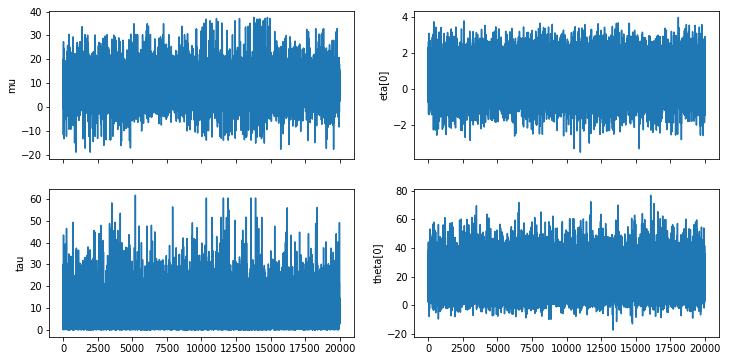

In [71]:
# plot the simulations for mu, tau, eta[0], theta[0]
f, axarr = plt.subplots(2, 2, sharex=True, figsize=(12, 6))
axarr[0, 0].plot(nSims['mu'])
axarr[0, 0].set_ylabel('mu')

axarr[1, 0].plot(nSims['tau'])
axarr[1, 0].set_ylabel('tau')

axarr[0, 1].plot(nSims['eta'][:,0])
axarr[0, 1].set_ylabel('eta[0]')

axarr[1, 1].plot(nSims['theta'][:,0])
axarr[1, 1].set_ylabel('theta[0]')

plt.show()                    

/home/vermosen/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  """Entry point for launching an IPython kernel.


[[[  6.12732058  20.28183408   0.62622155 ...,  12.38205816  15.08064771
    -0.36760339]
  [  8.98723625  11.65521464   1.28232328 ...,   9.44011209   7.61045214
    -4.23693523]
  [  2.1374944   23.80018772   1.12506466 ...,  11.81082875  -3.60670508
    -1.57392025]
  [  2.5172303    8.29014857   1.03341151 ...,  12.93065275  -8.37960676
    -3.72199134]]

 [[  9.96800354  10.84922558   1.77101263 ...,  17.29626231   5.27801435
    -3.04979867]
  [ 12.12011229   3.92263369  -0.09649562 ...,   9.05088668  17.46037497
    -5.22138922]
  [  2.13370864  11.6911002    1.49483741 ...,  10.91172874   0.5401027
    -1.73969667]
  [  3.89296925  20.25516512   1.47852383 ...,   8.60326956  -6.65725152
    -1.87563558]]

 [[ 12.3838596    1.3338013   -1.44133479 ...,  12.60184241  12.67525947
    -6.71883979]
  [  0.76952224  20.60215261   0.97288598 ...,  22.03015522 -14.27807714
    -2.44616565]
  [  6.15653832  17.3934716    1.72965017 ...,  24.74430867   5.41538516
    -1.86253306]
  [ -0.